# Coins classification
---

Complete the following cells in order to classify the following coins images:

![coins](images/coins.png)

as follows:

![coins classification](images/coins_classification.png)

Large coins count as 5 units, small copper coins count as 0.5 units, while small silver coins count as 1 unit.

#### Basic imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

(718, 957, 3)


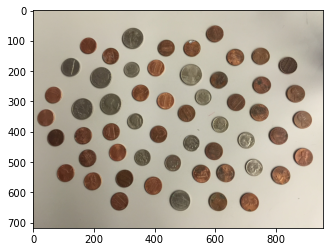

In [2]:
coins = cv2.imread('images/coins.png')
coins = cv2.cvtColor(coins, cv2.COLOR_BGR2RGB)

coins_clasificadas_profesor = cv2.imread('images/coins_classification.png')
coins_clasificadas_profesor = cv2.cvtColor(coins_clasificadas_profesor, cv2.COLOR_BGR2RGB)


print(coins.shape)

plt.imshow(coins)

1. Select a color space that allows you to obtains a specific, and useful, characteristic from the coin image. Plot an image of said characteristic from the coins image. Remember to apply all the preprocessing steps that may be requiered.

Text(0.5, 1.0, 'Monedas platas, S de HSV')

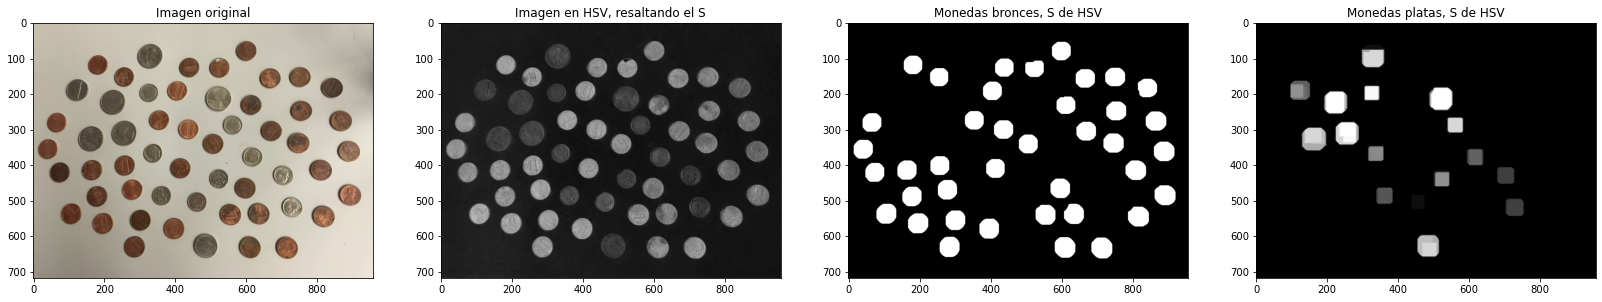

In [3]:
hsv_coins_color = np.copy(coins)

hsv_coins_grey = np.copy(coins)
hsv_coins_grey = cv2.cvtColor(hsv_coins_grey, cv2.COLOR_RGB2HSV)
hsv_coins_grey = hsv_coins_grey[:,:,1]

coins_copy_bronce = np.copy(coins)
coins_copy_bronce = cv2.cvtColor(coins_copy_bronce, cv2.COLOR_RGB2HSV)
coins_copy_bronce = coins_copy_bronce[:,:,1]
coins_copy_bronce = cv2.GaussianBlur(coins_copy_bronce, (55,55), 1)
kernel = np.ones((21,21), np.uint8)
coins_copy_bronce = cv2.morphologyEx(coins_copy_bronce, cv2.MORPH_OPEN, kernel)
coins_copy_bronce, binary_bronce = cv2.threshold(coins_copy_bronce, 0, 1, cv2.THRESH_OTSU)

coins_copy_silver = np.copy(coins)
coins_copy_silver = cv2.cvtColor(coins_copy_silver, cv2.COLOR_RGB2HSV)
coins_copy_silver = coins_copy_silver[:,:,1]
silver_mask = cv2.inRange(coins_copy_silver, 40, 92)
coins_copy_silver, binary_silver = cv2.threshold(silver_mask, 0, 255, cv2.THRESH_OTSU)
binary_silver = cv2.GaussianBlur(binary_silver, (37,37), 1)
kernel = np.ones((35,35), np.uint8)
binary_silver = cv2.morphologyEx(binary_silver, cv2.MORPH_OPEN, kernel)

f, (hsv_nogray, hsv_gray, bronze, silver) = plt.subplots(1, 4, figsize=(28, 10))
bronze.imshow(binary_bronce, cmap="gray")
bronze.set_title("Monedas bronces, S de HSV")
hsv_nogray.imshow(coins)
hsv_nogray.set_title("Imagen original")
hsv_gray.imshow(hsv_coins_grey, cmap="gray")
hsv_gray.set_title("Imagen en HSV, resaltando el S")
silver.imshow(binary_silver, cmap="gray")
silver.set_title("Monedas platas, S de HSV")

# TO DO: Obtain a characteristic and plot it.

2. Obtain the coin contours and plot and image of all the contours. Add all the code cells that may be required.

Text(0.5, 1.0, 'Contornos VERDES son monedas BRONCES y ROJOS son PLATA')

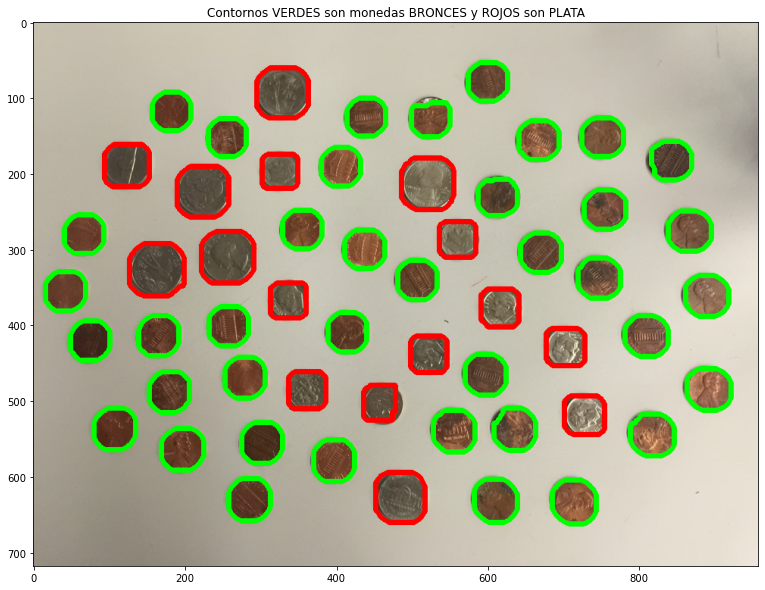

In [4]:
coins_con = np.copy(coins)

(contours_bronce, _) = cv2.findContours(binary_bronce, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
(contours_silver, _) = cv2.findContours(binary_silver, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

all_contours = cv2.drawContours(coins_con, contours_bronce, -1, (0,255,0), 5)
all_contours = cv2.drawContours(coins_con, contours_silver, -1, (255,0,0), 5)

f, (contornos) = plt.subplots(1, 1, figsize=(28, 10))
contornos.imshow(all_contours)
contornos.set_title("Contornos VERDES son monedas BRONCES y ROJOS son PLATA")


3. Using the contour features, obtain any feature that may be useful to classify the coins. Store the feature in a dictionary for future reference.

Diccionario de bronces: {'0': [32, 'bronce'], '1': [31, 'bronce'], '2': [30, 'bronce'], '3': [30, 'bronce'], '4': [30, 'bronce'], '5': [29, 'bronce'], '6': [31, 'bronce'], '7': [30, 'bronce'], '8': [30, 'bronce'], '9': [30, 'bronce'], '10': [29, 'bronce'], '11': [31, 'bronce'], '12': [29, 'bronce'], '13': [29, 'bronce'], '14': [28, 'bronce'], '15': [30, 'bronce'], '16': [29, 'bronce'], '17': [28, 'bronce'], '18': [29, 'bronce'], '19': [30, 'bronce'], '20': [29, 'bronce'], '21': [28, 'bronce'], '22': [30, 'bronce'], '23': [29, 'bronce'], '24': [28, 'bronce'], '25': [28, 'bronce'], '26': [30, 'bronce'], '27': [28, 'bronce'], '28': [30, 'bronce'], '29': [28, 'bronce'], '30': [28, 'bronce'], '31': [29, 'bronce'], '32': [29, 'bronce'], '33': [27, 'bronce'], '34': [29, 'bronce'], '35': [28, 'bronce'], '36': [28, 'bronce'], '37': [27, 'bronce'], '38': [28, 'bronce']}

Diccionario de platas: {'0': [36, 'silver'], '1': [30, 'silver'], '2': [27, 'silver'], '3': [28, 'silver'], '4': [27, 'silver'

Text(0.5, 1.0, 'Contornos ajustados a circunferencia de imagenes. VERDES son monedas BRONCES y ROJOS son PLATA')

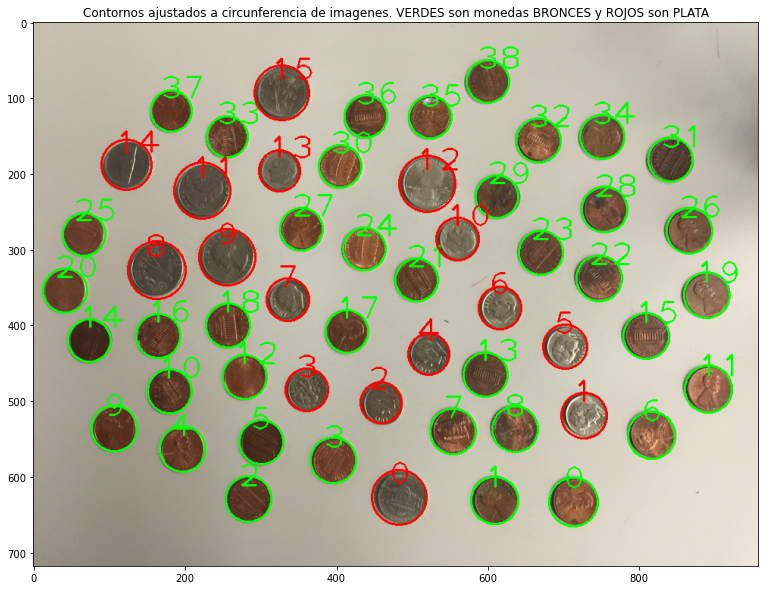

In [5]:
contornos_act_imagen = np.copy(coins)

def get_radius_coins(coins, color):
    dictonary = {}
    #La separación de colores se hace desde el PROCESAMIENTO DE LA IMAGEN, por lo que no se realiza código adicional
    if coins == contours_bronce: coin_color = "bronce"
    else: coin_color = "silver"
    for idx, selected_contour in enumerate(coins):
        if(selected_contour is not None):
            (x,y),radius = cv2.minEnclosingCircle(selected_contour)
            center = (int(x), int(y))
            radius = int(radius)
            if coins == contours_silver:
                radius -= 2 #Arreglar un poco las monedas plateadas, que agarraba el radio un poco mas grande de lo necesario
            cv2.circle(contornos_act_imagen,center,radius,color,2)
            
            moments = cv2.moments(selected_contour)
            cx = int(moments['m10']/moments['m00'])
            cy = int(moments['m01']/moments['m00'])
            cv2.putText(contornos_act_imagen, str(idx), (cx-15, cy-15), cv2.FONT_HERSHEY_PLAIN, 3, color, 2, cv2.LINE_8)

            dictonary[str(idx)] = [int(radius), coin_color]
    return dictonary

dictonary_contours_bronce = get_radius_coins(contours_bronce, (0,255,0))
print("Diccionario de bronces: " + str(dictonary_contours_bronce) + "\n")
dictonary_contours_silver = get_radius_coins(contours_silver, (255,0,0))
print("Diccionario de platas: " + str(dictonary_contours_silver))

f, (contornos_actualizados) = plt.subplots(1, 1, figsize=(28, 10))
contornos_actualizados.imshow(contornos_act_imagen)
contornos_actualizados.set_title("Contornos ajustados a circunferencia de imagenes. VERDES son monedas BRONCES y ROJOS son PLATA")

4. Separate the coins based on color. Obtain the average color of each coin, and store this information in a dictionary.

Diccionario de bronces: {'0': [32, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '1': [31, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '2': [30, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '3': [30, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '4': [30, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '5': [29, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '6': [31, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '7': [30, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '8': [30, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '9': [30, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '10': [29, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '11': [31, 'bronce', (79.29308074255445, 52.946844728858366, 38.0666465062286)], '12': [29, 'b

Text(0.5, 1.0, 'Color promedio plata')

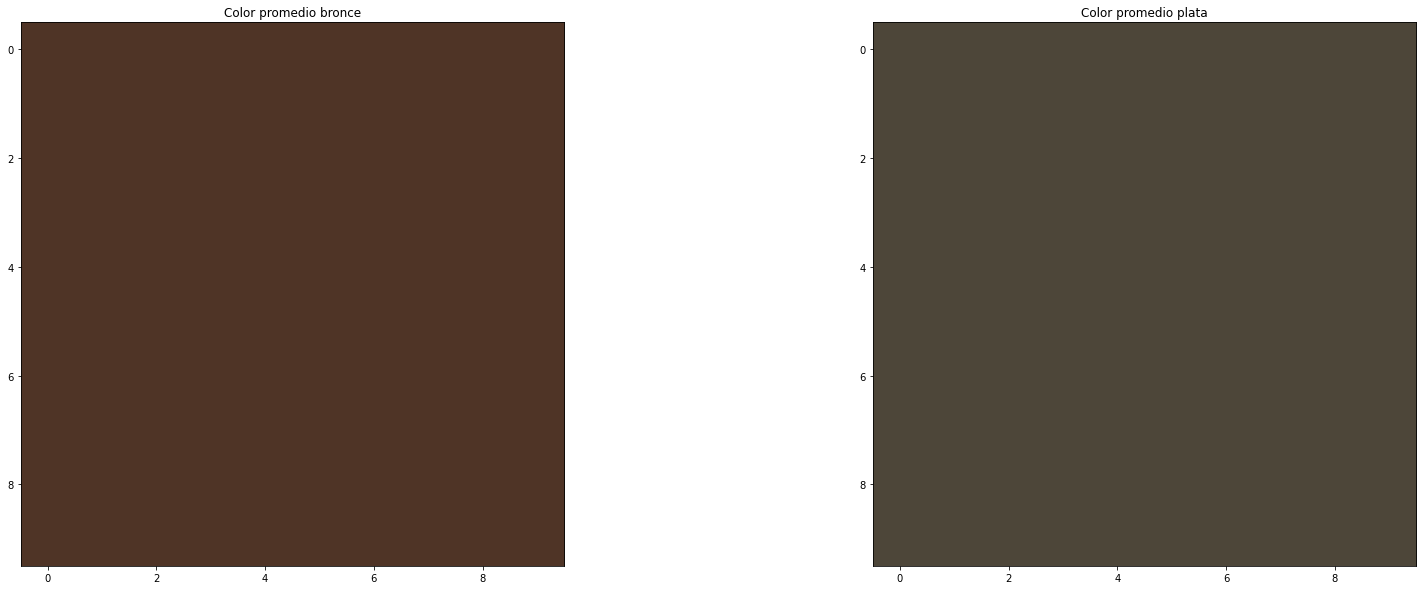

In [6]:
def average_color(coins, dictonary):
    mean_r = 0
    mean_g = 0
    mean_b = 0
    pixel_numbers = 0
    for idx, selected_contour in enumerate(coins):
        if(selected_contour is not None):
            rect = cv2.minAreaRect(selected_contour)
            box = cv2.boxPoints(rect)
            #print(box)
            pixel_numbers += (int(box[2][0]) - int(box[0][0])) * (int(box[0][1]) - int(box[1][1]) - 4)
            for y in range(int(box[0][0])+5, int(box[2][0])-5):
                for x in range(int(box[1][1]+5), int(box[0][1])-5):
                  mean_r += hsv_coins_color[x][y][0]
                  mean_g += hsv_coins_color[x][y][1]
                  mean_b += hsv_coins_color[x][y][2]
                  
    mean_r = mean_r/pixel_numbers
    mean_g = mean_g/pixel_numbers
    mean_b = mean_b/pixel_numbers

    for element in dictonary:
        if len(dictonary[element]) < 3: 
            dictonary[element].append((mean_r, mean_g, mean_b))

    return(mean_r, mean_g, mean_b)

bronce_color = average_color(contours_bronce, dictonary_contours_bronce)
silver_color = average_color(contours_silver, dictonary_contours_silver)

bronce = np.zeros((10, 10,3), np.uint8)
for index in range(len(bronce)):
    bronce[index] = bronce_color
plata = np.zeros((10, 10,3), np.uint8)
for index in range(len(plata)):
    plata[index] = silver_color

print("Diccionario de bronces: " + str(dictonary_contours_bronce) + "\n")
print("Diccionario de platas: " + str(dictonary_contours_silver))

f, (promedio_bronce, promedio_plata) = plt.subplots(1, 2, figsize=(28, 10))
promedio_bronce.imshow(bronce)
promedio_bronce.set_title("Color promedio bronce")
promedio_plata.imshow(plata)
promedio_plata.set_title("Color promedio plata")

5. Using the information that you generated, plot an image that adds a text with the value of each coin to the image at the position of each coin. Large coins are worth 5 units, small silver coins are worth 1 unit, while small copper coins are worth 0.5 units.

Text(0.5, 1.0, 'Imagen con monedas clasificadas por Profesor')

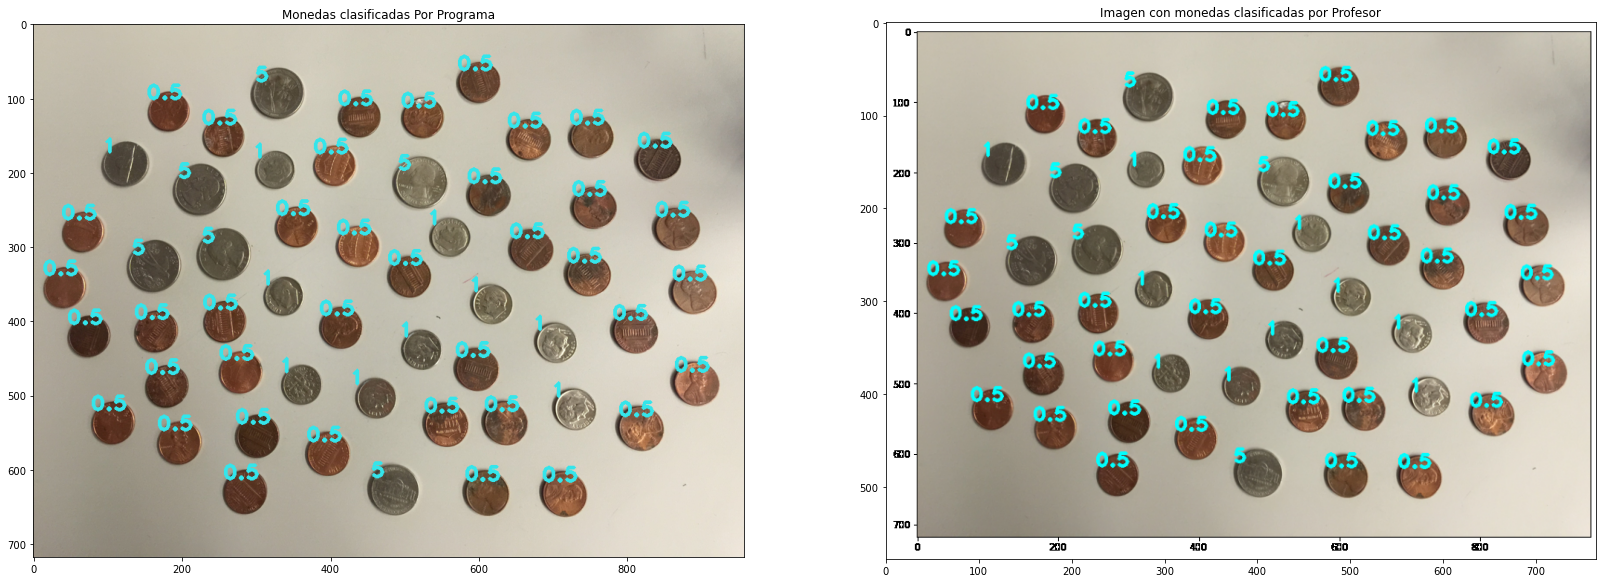

In [7]:
classified_coins = np.copy(coins)

def classify_coins(coins, dictonary):
    for idx, selected_contour in enumerate(coins):
        if(selected_contour is not None):
            
            moments = cv2.moments(selected_contour)
            cx = int(moments['m10']/moments['m00'])
            cy = int(moments['m01']/moments['m00'])

            if dictonary[str(idx)][1] == "bronce":  cv2.putText(classified_coins, str(0.5), (cx-30, cy-15), cv2.FONT_HERSHEY_PLAIN, 2, (52, 229, 235), 3, cv2.LINE_8)
            elif dictonary[str(idx)][1] == "silver" and  dictonary[str(idx)][0] < 34: cv2.putText(classified_coins, str(1), (cx-30, cy-15), cv2.FONT_HERSHEY_PLAIN, 2, (52, 229, 235), 3, cv2.LINE_8)
            else: cv2.putText(classified_coins, str(5), (cx-30, cy-15), cv2.FONT_HERSHEY_PLAIN, 2, (52, 229, 235), 3, cv2.LINE_8)

         
classify_coins(contours_bronce, dictonary_contours_bronce)
classify_coins(contours_silver, dictonary_contours_silver)

f, (mondeas_clasificadas, imagen_solucion_proporcionada) = plt.subplots(1, 2, figsize=(28, 10))
mondeas_clasificadas.imshow(classified_coins)
mondeas_clasificadas.set_title("Monedas clasificadas Por Programa")
imagen_solucion_proporcionada.imshow(coins_clasificadas_profesor)
imagen_solucion_proporcionada.set_title("Imagen con monedas clasificadas por Profesor")